In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


Missing Values,Data Cleaning
Outliers
Correlation
Vizulation
Normalize
Multicollinearity
Dummies
LINEAR REGRESSION MODEL
Improving Model

In [ ]:
#  Load the dataset
raw_data = pd.read_csv("scrap price.csv")
raw_data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
raw_data.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
raw_data.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data=raw_data.drop('ID',axis=1)
data

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [ ]:
data.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Name column has many unique values, so I've decided to organise it a bit


In [ ]:
#Name column has many unique values, so I've decided to organise it a bit
Car_name = data['name'].apply(lambda x : x.split(' ')[0])
data.insert(3,'Car_name',Car_name)
data.drop(['name'],axis=1,inplace=True)
data

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data['Car_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Some spelling errors:

maxda=mazda

Nissan=nissan

porsche=porcshce

vokswagen=volkswagen=vw



In [ ]:
data['Car_name'] = data['Car_name'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
data.columns

Index(['symboling', 'fueltypes', 'Car_name', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Outliers

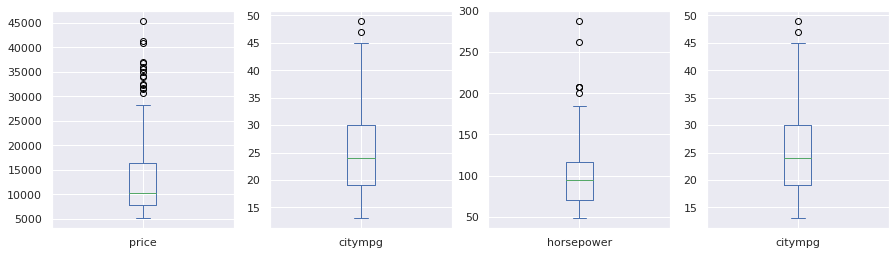

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
data.price.plot(kind='box')
plt.subplot(1,4,2)
data.citympg.plot(kind='box')
plt.subplot(1,4,3)
data.horsepower.plot(kind='box')
plt.subplot(1,4,4)
data.citympg.plot(kind='box')
plt.show()

In [ ]:
#Removing outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data2 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,gas,volvo,turbo,four,wagon,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


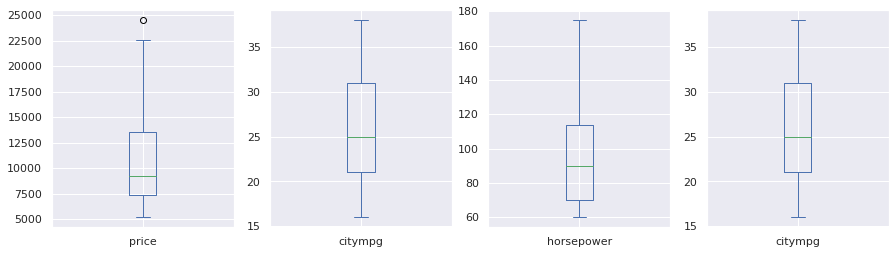

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
data2.price.plot(kind='box')
plt.subplot(1,4,2)
data2.citympg.plot(kind='box')
plt.subplot(1,4,3)
data2.horsepower.plot(kind='box')
plt.subplot(1,4,4)
data2.citympg.plot(kind='box')
plt.show()

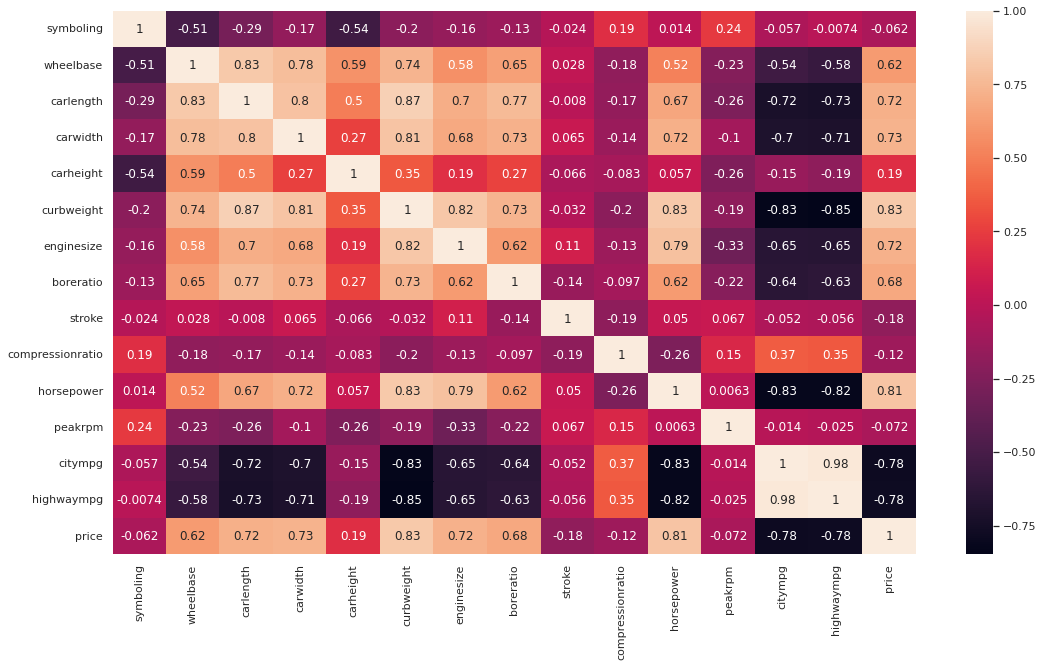

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [ ]:
data2.drop(columns=['wheelbase','carwidth','carlength','highwaympg'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data2.columns

Index(['symboling', 'fueltypes', 'Car_name', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'price'],
      dtype='object')

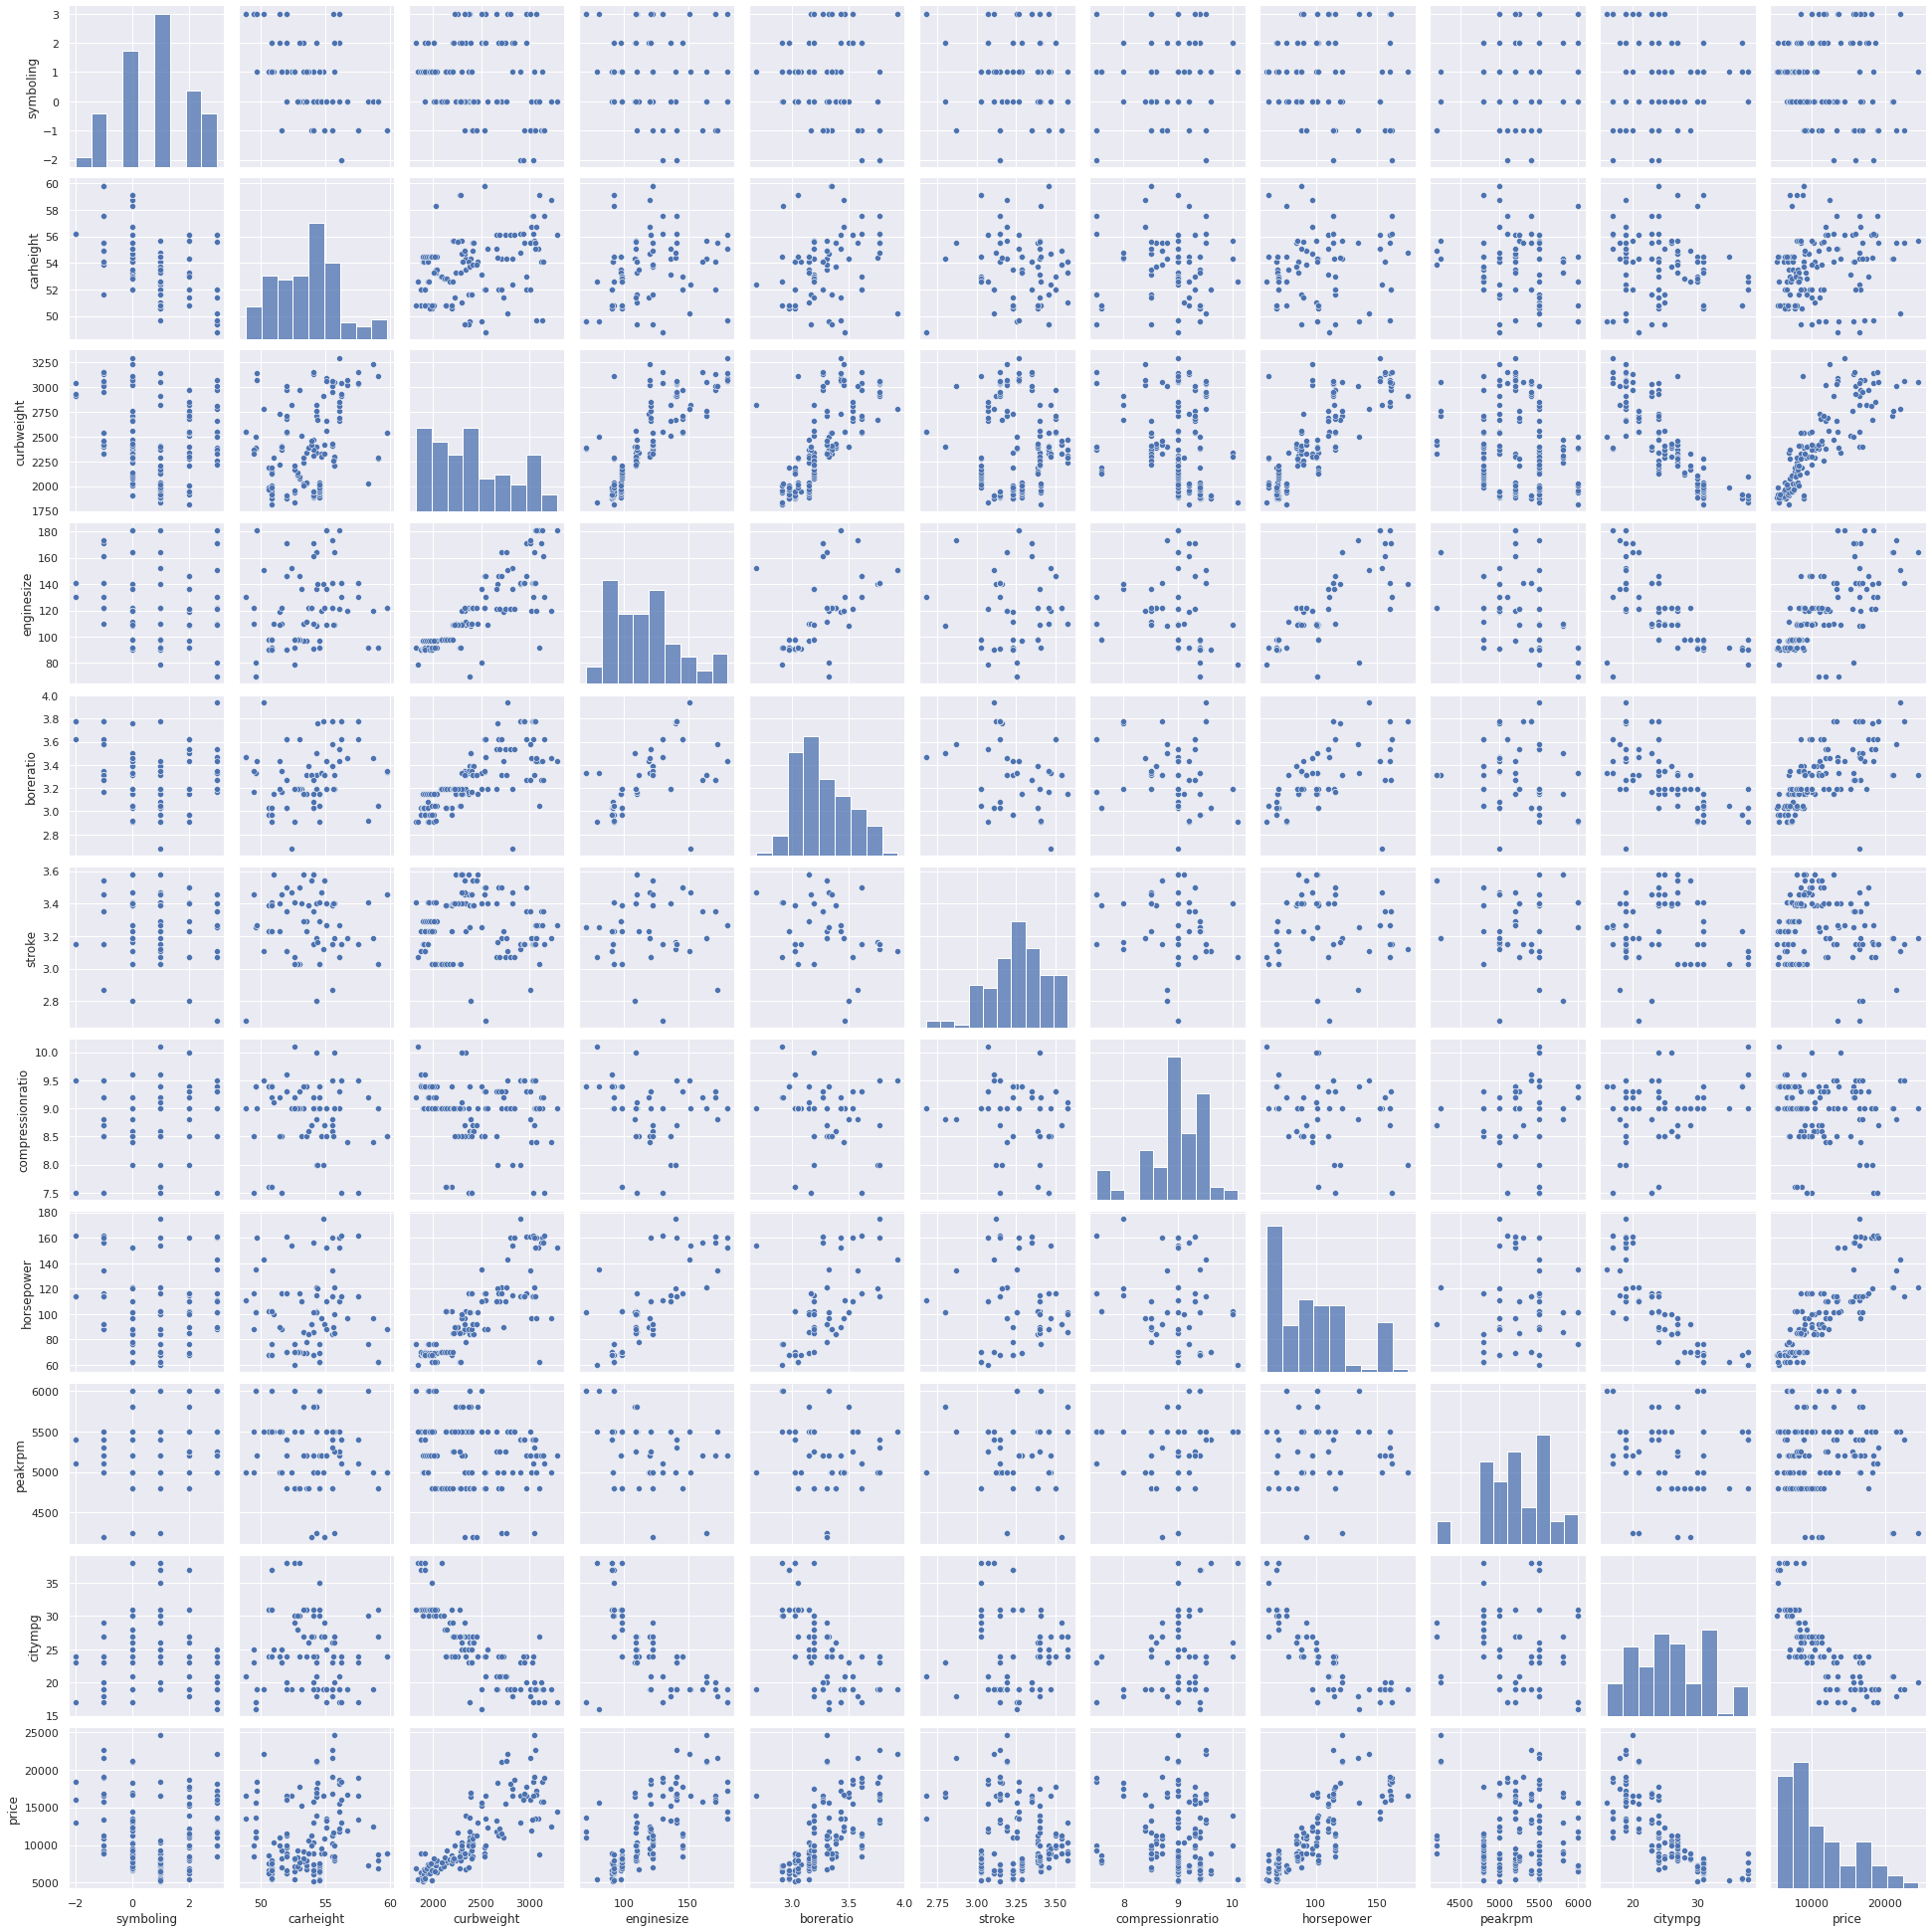

In [ ]:
sns.pairplot(data2)

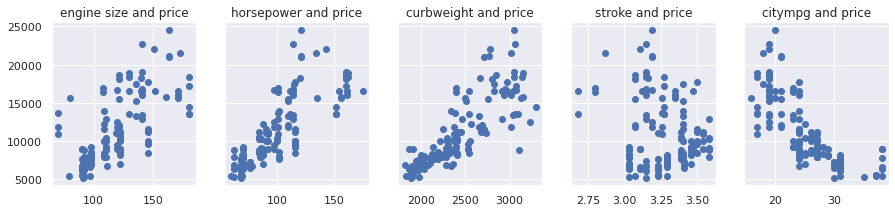

In [ ]:
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) 
ax1.scatter(data2['enginesize'],data2['price'])
ax1.set_title('engine size and price')
ax2.scatter(data2['horsepower'],data2['price'])
ax2.set_title('horsepower and price')
ax3.scatter(data2['curbweight'],data2['price'])
ax3.set_title('curbweight and price')
ax4.scatter(data2['stroke'],data2['price'])
ax4.set_title('stroke and price')
ax5.scatter(data2['citympg'],data2['price'])
ax5.set_title('citympg and price')

plt.show()

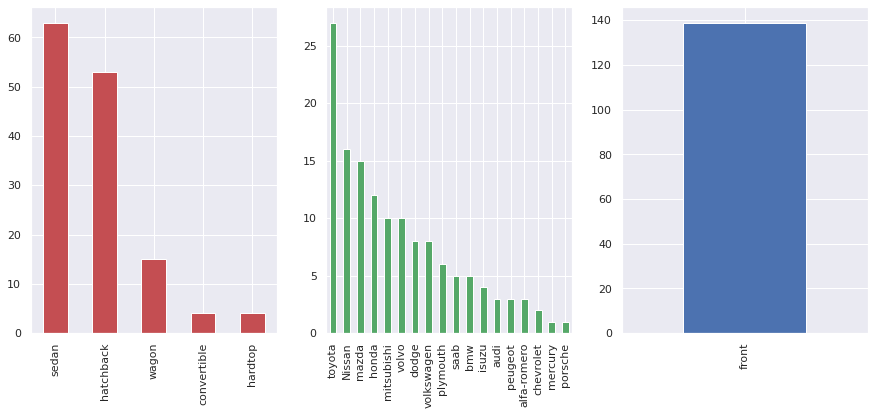

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
data2.carbody.value_counts().plot(kind='bar',color='r')
plt.subplot(1,3,2)
data2.Car_name.value_counts().plot(kind='bar',color='g')
plt.subplot(1,3,3)
data2.enginelocation.value_counts().plot(kind='bar',color='b')

Observation:

Toyota seemed to be favored car company.
Number of gas fueled cars are more than diesel.
Linearity observed between price and several columns

Normalize


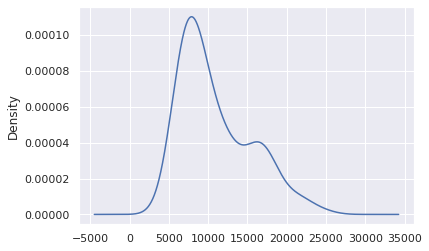

In [ ]:
#Our dependent values(y) are price 
data2.price.plot.density()
plt.show()

In [ ]:
log_price = np.log(data2['price'])

# Then we add it to our data frame
data2['log_price'] = log_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data_normal=data2.drop(['price'],axis=1)
data_normal

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,carheight,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,log_price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,48.8,2548,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,9.510075
1,3,gas,alfa-romero,std,two,convertible,rwd,front,48.8,2548,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,9.711116
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,52.4,2823,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,9.711116
3,2,gas,audi,std,four,sedan,fwd,front,54.3,2337,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,9.543235
4,2,gas,audi,std,four,sedan,4wd,front,54.3,2824,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,gas,volvo,turbo,four,wagon,rwd,front,57.5,3157,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,9.849559
200,-1,gas,volvo,std,four,sedan,rwd,front,55.5,2952,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,9.731809
201,-1,gas,volvo,turbo,four,sedan,rwd,front,55.5,3049,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,9.854560
202,-1,gas,volvo,std,four,sedan,rwd,front,55.5,3012,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,9.975110


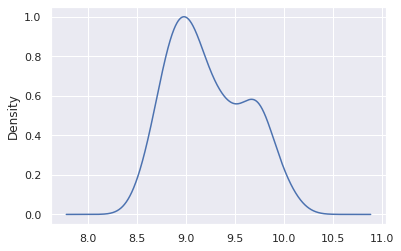

In [ ]:
data2.log_price.plot.density()

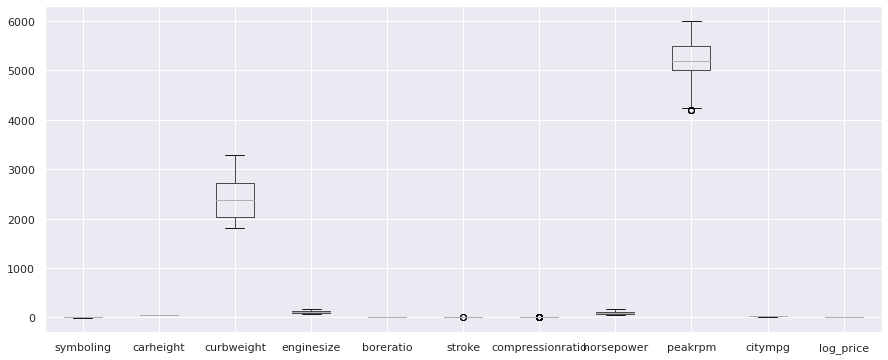

In [ ]:
plt.figure(figsize=(15,6))
data_normal.boxplot()

Much more better.Let's continue with multicollinearity

Multicollinearity
Sklearn does not have a built-in way to check for multicollinearity.One of the main reasons is that this is an issue well covered in statistical\frameworks and not in ML ones surely it is an issue nonetheless, thus we will try to deal with it. To make this as easy as possible to use, we declare a variable where we put all features where we want to check for multicollinearity since our categorical data is not yet preprocessed, we will only take the numerical ones

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_normal[['symboling', 'carheight', 'curbweight',
        'enginesize',  'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]


In [ ]:
vif = pd.DataFrame()

In [ ]:
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [ ]:
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.313650,symboling
1,625.018653,carheight
2,349.645491,curbweight
3,115.322045,enginesize
4,356.427583,boreratio
5,281.268139,stroke
6,467.474599,compressionratio
7,76.007751,horsepower
8,252.226419,peakrpm
9,116.204912,citympg


In [ ]:
#carheight,compressionratio,boreratio,stroke,curbweight,peakrpm,enginesize c
#columns have strong multicollinearity so I'm going drop these columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_normal[['symboling',
       'horsepower', 'citympg']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.464093,symboling
1,4.784584,horsepower
2,4.773393,citympg


In [ ]:
data_multi=data_normal.drop(['carheight','compressionratio','boreratio','stroke','curbweight','peakrpm','enginesize'],axis=1)
data_multi

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem,horsepower,citympg,log_price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,111,21,9.510075
1,3,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,111,21,9.711116
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,154,19,9.711116
3,2,gas,audi,std,four,sedan,fwd,front,ohc,four,mpfi,102,24,9.543235
4,2,gas,audi,std,four,sedan,4wd,front,ohc,five,mpfi,115,18,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,gas,volvo,turbo,four,wagon,rwd,front,ohc,four,mpfi,162,17,9.849559
200,-1,gas,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,114,23,9.731809
201,-1,gas,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,160,19,9.854560
202,-1,gas,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,134,18,9.975110


Dummies


In [ ]:
data_dummies=pd.get_dummies(data_multi, drop_first=True)
data_dummies

,symboling,horsepower,citympg,log_price,Car_name_alfa-romero,Car_name_audi,Car_name_bmw,Car_name_chevrolet,Car_name_dodge,Car_name_honda,...,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,111,21,9.510075,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,3,111,21,9.711116,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,154,19,9.711116,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,2,102,24,9.543235,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2,115,18,9.767095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,162,17,9.849559,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
200,-1,114,23,9.731809,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
201,-1,160,19,9.854560,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
202,-1,134,18,9.975110,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


Linear Regression Model


In [ ]:
y = data_dummies ['log_price']
x1 = data_dummies.drop(['log_price'],axis=1)
x = sm.add_constant(pd.DataFrame(x1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
inputs_scaled = scaler.transform(x)
inputs_scaled

array([[ 0.        ,  1.75078474,  0.48024625, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        ,  1.75078474,  0.48024625, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        ,  0.12296481,  1.9500014 , ...,  1.09833929,
        -0.19316685, -0.08512565],
       ...,
       [ 0.        , -1.50485511,  2.15508352, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        , -1.50485511,  1.26639435, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        , -1.50485511,  0.5827873 , ...,  1.09833929,
        -0.19316685, -0.08512565]])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y_train,x_train).fit()
# Print a nice summary of the regression.
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     21.36
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           8.36e-27
Time:                        11:54:07   Log-Likelihood:                 82.454
No. Observations:                 111   AIC:                            -90.91
Df Residuals:                      74   BIC:                             9.345
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.451e-15   1.65e-17    389.839      0.000    6.42e-15    6.48e-15
x1             0.0116      0.036      0.320      0.750      -0.061       0.084
x2             0.1695      0.059      2.879      0.005       0.052       0.287
x3            -0.0868      0.040     -2.149      0.035      -0.167      -0.006
x4             0.0310      0.021      1.485      0.142      -0.011       0.073
x5             0.0437      0.023      1.905      0.061      -0.002       0.089
x6             0.1167      0.024      4.823      0.000       0.069       0.165
x7           -50.9513      0.079   -641.381      0.000     -51.110     -50.793
x8            -0.0149      0.018     -0.822      0.414      -0.051       0.021
x9             0.0467      0.046      1.016      0.313      -0.045       0.138
x10            0.0324      0.019      1.748      0.085      -0.005       0.069
x11            0.0178      0.022      0.793      0.430      -0.027       0.062
x12            0.0115      0.017      0.674      0.503      -0.022       0.045
x13           -0.0255      0.023     -1.103      0.274      -0.072       0.021
x14            0.0276      0.014      1.946      0.055      -0.001       0.056
x15           -0.0177      0.018     -1.008      0.317      -0.053       0.017
x16            0.0494      0.016      3.125      0.003       0.018       0.081
x17            0.0395      0.024      1.677      0.098      -0.007       0.087
x18            0.0304      0.030      1.028      0.307      -0.029       0.089
x19            0.0116      0.025      0.467      0.642      -0.038       0.061
x20            0.1127      0.038      2.960      0.004       0.037       0.188
x21           -0.0016      0.027     -0.060      0.952      -0.056       0.052
x22           -0.0354      0.024     -1.496      0.139      -0.083       0.012
x23           -0.0364      0.027     -1.339      0.185      -0.091       0.018
x24           -0.1057      0.071     -1.492      0.140      -0.247       0.036
x25           -0.1103      0.074     -1.486      0.142      -0.258       0.038
x26           -0.0482      0.050     -0.967      0.337      -0.147       0.051
x27            0.0019      0.059      0.033      0.974      -0.116       0.120
x28           -0.0240      0.066     -0.360      0.720      -0.156       0.108
x29            0.0276      0.014      1.946      0.055      -0.001       0.056
x30            0.0053      0.042      0.126      0.900      -0.079       0.090
x31           -0.0077      0.029     -0.262      0.794      -0.066       0.051
x32            0.0086      0.020      0.428      0.670      -0.031       0.049
x33           -0.0347      0.048     -0.728      0.469      -0.130       0.060
x34           -0.0044      0.050     -0.089      0.929      -0.104       0.095
x35            0.0086      0.020      0.428      0.670      -0.031       0.049
x3

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.


**p-vale of the columns 2,3,5,6,15,16,40 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.


In [ ]:
new_x=[]
for i in [2,3,5,6,15,16,40]:
    new_x.append(list(x.columns)[i])
new_data=x[new_x]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
scaler.fit(new_data)
inputs_scaled = scaler.transform(new_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [ ]:
results = sm.OLS(y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     81.65
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           4.41e-37
Time:                        11:55:19   Log-Likelihood:                 44.133
No. Observations:                 111   AIC:                            -74.27
Df Residuals:                     104   BIC:                            -55.30
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1639      0.029      5.567      0.000       0.106       0.222
x2            -0.1602      0.030     -5.373      0.000      -0.219      -0.101
x3             0.0327      0.018      1.856      0.066      -0.002       0.068
x4             0.0918      0.015      6.299      0.000       0.063       0.121
x5            -0.0267      0.016     -1.689      0.094      -0.058       0.005
x6             0.0301      0.014      2.086      0.039       0.001       0.059
x7          -108.1807      0.188   -575.835      0.000    -108.553    -107.808
==============================================================================
Omnibus:                        9.032   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.420
Skew:                           0.549   Prob(JB):                      0.00900
Kurtosis:                       3.913   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion


In [ ]:
y_hat = results.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(np.exp(y_train), np.exp(y_hat))
lin_mae

1263.5646875683728

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

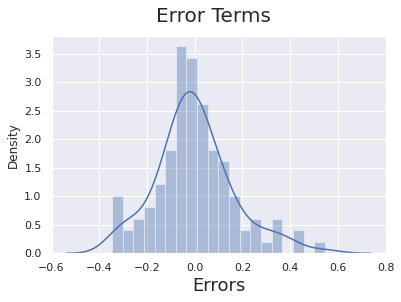

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_hat), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
